In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

rng = np.random.RandomState(13)
X = np.dot(rng.rand(2,2), rng.randn(2,200)).T
X.shape

(200, 2)

(-2.346839332894307, 2.4400046646752487, -3.8591181666878738, 4.08448257499405)

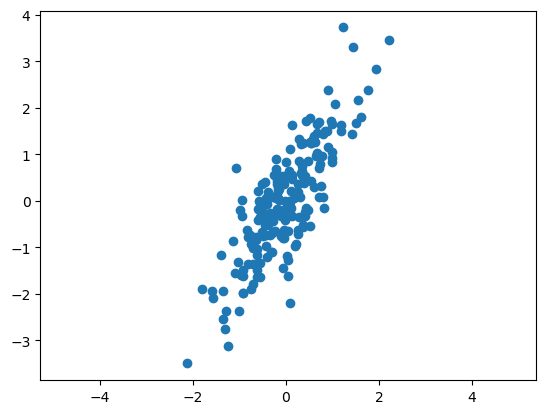

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=1234)
pca.fit(X)

PCA(n_components=2, random_state=1234)

In [6]:
pca.components_

array([[ 0.47802511,  0.87834617],
       [-0.87834617,  0.47802511]])

In [7]:
pca.explained_variance_

array([1.82531406, 0.13209947])

In [8]:
pca.explained_variance_ratio_

array([0.93251326, 0.06748674])

In [12]:
pca.mean_

array([-0.03360413, -0.03527382])

In [9]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(
        arrowstyle='->',
        linewidth=2,
        color='black',
        shrinkA=0,
        shrinkB=0,
    )
    ax.annotate('',v1,v0,arrowprops=arrowprops)

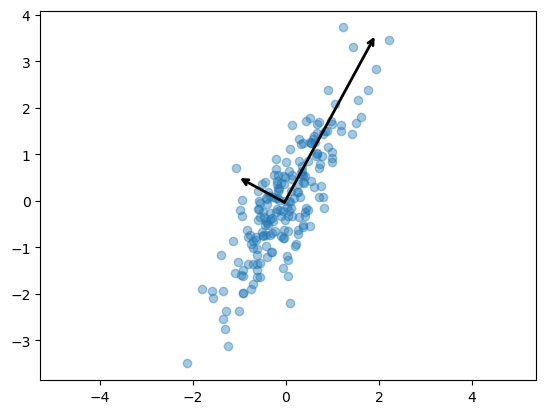

In [11]:
plt.scatter(X[:,0],X[:,1],alpha=0.4)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')
plt.show()

In [13]:
pca = PCA(n_components=1, random_state=1234)
pca.fit(X)

PCA(n_components=1, random_state=1234)

In [14]:
pca.components_

array([[0.47802511, 0.87834617]])

In [15]:
pca.mean_

array([-0.03360413, -0.03527382])

In [16]:
pca.explained_variance_

array([1.82531406])

In [17]:
X_pca = pca.transform(X)
X_pca

array([[-2.95245605e-01],
       [ 5.81990204e-01],
       [ 4.94740664e-01],
       [ 3.90158943e+00],
       [ 2.03180114e+00],
       [-2.37387479e-01],
       [ 3.07183781e-01],
       [-9.76548958e-01],
       [-1.18765161e+00],
       [-2.82710528e+00],
       [-9.91290035e-01],
       [-2.02286254e-01],
       [ 6.00622089e-01],
       [ 7.79971960e-01],
       [ 7.37780392e-02],
       [ 3.46215509e+00],
       [-1.04906286e+00],
       [ 5.96660174e-01],
       [-1.81382807e+00],
       [ 4.51563537e-01],
       [ 2.01737882e+00],
       [-2.99850475e+00],
       [-1.96803107e-01],
       [-4.03478939e-02],
       [-5.99621281e-01],
       [-1.66341828e+00],
       [ 1.91711964e+00],
       [-1.26733467e+00],
       [ 5.67207186e-01],
       [ 2.22460631e+00],
       [-7.83250597e-01],
       [-1.85775051e+00],
       [-2.27800068e-01],
       [-1.24793583e+00],
       [ 1.38641268e+00],
       [-6.96367767e-01],
       [-2.14750524e+00],
       [ 1.31675186e+00],
       [-4.7

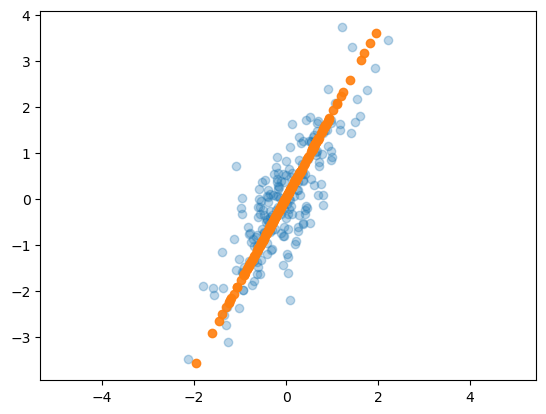

In [18]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0], X[:,1], alpha=0.3)
plt.scatter(X_new[:,0], X_new[:,1], alpha=0.9)
plt.axis('equal')
plt.show()

---

## iris data

In [19]:
import pandas as pd
from sklearn.datasets import load_iris

In [21]:
iris = load_iris()

iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd['species'] = iris.target

iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
from sklearn.preprocessing import StandardScaler

iris_ss = StandardScaler().fit_transform(iris.data)
iris_ss[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [23]:
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca

In [25]:
iris_pca, pca=get_pca_data(iris_ss,2)
iris_pca.shape

(150, 2)

In [26]:
pca.mean_

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [27]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [32]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [28]:
def get_pd_from_pca(pca_data, cols=['PC1','PC2']):
    return pd.DataFrame(pca_data, columns=cols)

In [29]:
iris_pd_pca = get_pd_from_pca(iris_pca)
iris_pd_pca['species'] = iris.target
iris_pd_pca.head()

,PC1,PC2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


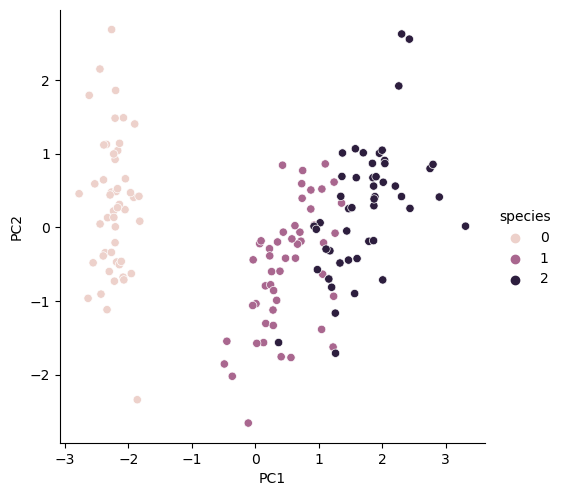

In [30]:
sns.pairplot(iris_pd_pca, hue='species', height=5, x_vars=['PC1'], y_vars=['PC2'])

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [38]:
def rf_scores(X,y,cv=5):
    rf = RandomForestClassifier(random_state=1234, n_estimators=100)
    scores_rf = cross_val_score(rf,X,y,scoring='accuracy', cv=cv)

    print('Score : ', np.mean(scores_rf))


In [40]:
# %%time
rf_scores(iris_ss, iris.target)

Score :  0.96
CPU times: total: 625 ms
Wall time: 703 ms


In [43]:
# %%time
pca_X = iris_pd_pca[['PC1','PC2']]
rf_scores(pca_X, iris.target)

Score :  0.9
CPU times: total: 641 ms
Wall time: 663 ms


---

## wine data

In [44]:
wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'
wine = pd.read_csv(wine_url, sep=',',index_col=0)

In [46]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [47]:
wine_X = wine.drop(['color'], axis=1)
wine_y = wine['color']

In [48]:
wine_ss = StandardScaler().fit_transform(wine_X)

In [49]:
def print_variance_ratio(pca):
    print('variance_ratio:',pca.explained_variance_ratio_)
    print('variance_ratio:',np.sum(pca.explained_variance_ratio_))

In [50]:
pca_wine, pca = get_pca_data(wine_ss, n_components=2)
print_variance_ratio(pca)

variance_ratio: [0.25346226 0.22082117]
variance_ratio: 0.47428342743236174


In [51]:
pca_column = ['PC1', 'PC2']
pca_wine_pd = pd.DataFrame(pca_wine, columns=pca_column)
pca_wine_pd['color'] = wine_y.values

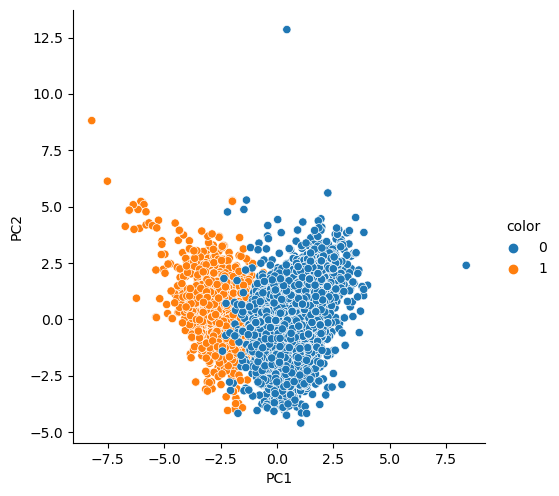

In [52]:
sns.pairplot(pca_wine_pd, hue='color',height=5, x_vars=['PC1'], y_vars=['PC2'])

In [54]:
rf_scores(wine_ss, wine_y)

Score :  0.9933811807899569


In [55]:
pca_X = pca_wine_pd[['PC1','PC2']]
rf_scores(pca_X, wine_y)

Score :  0.9810682773731273


In [56]:
pca_wine, pca = get_pca_data(wine_ss, n_components=3)
print_variance_ratio(pca)

variance_ratio: [0.25346226 0.22082117 0.13679223]
variance_ratio: 0.6110756621838702


In [57]:
pca_column = ['PC1', 'PC2', 'PC3']
pca_wine_pd = pd.DataFrame(pca_wine, columns=pca_column)
pca_wine_pd['color'] = wine_y.values

In [58]:
pca_X = pca_wine_pd[pca_column]
rf_scores(pca_X, wine_y)

Score :  0.9827618878427191


In [59]:
pca_wine_plot = pca_X
pca_wine_plot['color'] = wine_y.values

In [60]:
import plotly.express as px

fig = px.scatter_3d(pca_wine_plot, x='PC1', y='PC2', z='PC3', color='color', symbol='color', opacity=0.4)
fig.update_layout(margin=dict(l=0,r=0,b=0,t=0))
fig.show()

---

## fetch_olivetti_faces data

In [61]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
print(faces_all.DESCR)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\user\scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for 

In [62]:
K = 20
faces = faces_all.images[faces_all.target == K]

In [63]:
faces

array([[[0.5165289 , 0.5123967 , 0.5082645 , ..., 0.42975205,
         0.42561984, 0.41735536],
        [0.5082645 , 0.5123967 , 0.5206612 , ..., 0.42975205,
         0.42975205, 0.4214876 ],
        [0.4876033 , 0.5123967 , 0.5289256 , ..., 0.4338843 ,
         0.42975205, 0.42975205],
        ...,
        [0.3305785 , 0.44214877, 0.45041323, ..., 0.55785125,
         0.5495868 , 0.5413223 ],
        [0.35123968, 0.4338843 , 0.446281  , ..., 0.54545456,
         0.55785125, 0.55785125],
        [0.33471075, 0.4338843 , 0.44214877, ..., 0.56198347,
         0.55785125, 0.5661157 ]],

       [[0.23553719, 0.35123968, 0.4338843 , ..., 0.45867768,
         0.446281  , 0.47107437],
        [0.21900827, 0.36363637, 0.4338843 , ..., 0.46694216,
         0.44214877, 0.46694216],
        [0.2520661 , 0.35123968, 0.4338843 , ..., 0.47933885,
         0.45041323, 0.46280992],
        ...,
        [0.3966942 , 0.5041322 , 0.62396693, ..., 0.21900827,
         0.07024793, 0.07024793],
        [0.5

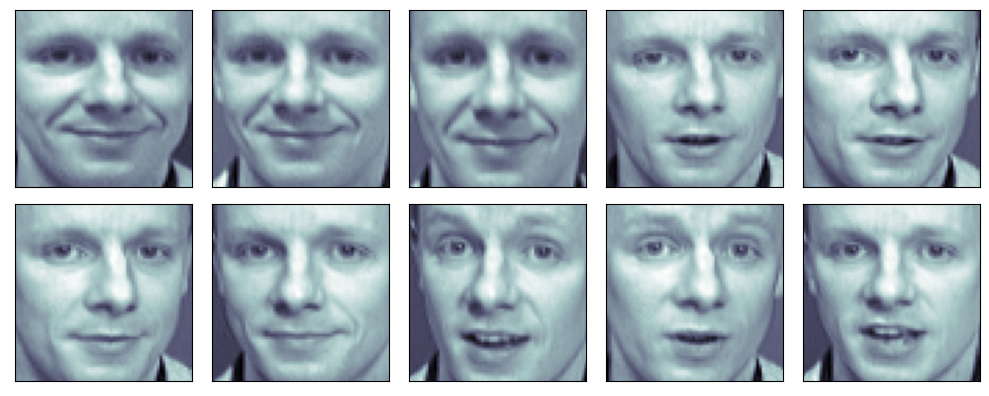

In [65]:
import matplotlib.pyplot as plt

N = 2
M = 5
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N,M,n+1)
    ax.imshow(faces[n], cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.tight_layout()
plt.show()

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X = faces_all.data[faces_all.target==K]

In [67]:
X.shape

(10, 4096)

In [68]:
np.sqrt(4096)

64.0

In [70]:
X[0].shape

(4096,)

In [71]:
W = pca.fit_transform(X)
W.shape

(10, 2)

In [72]:
X_inv = pca.inverse_transform(W)

In [74]:
X_inv.shape

(10, 4096)

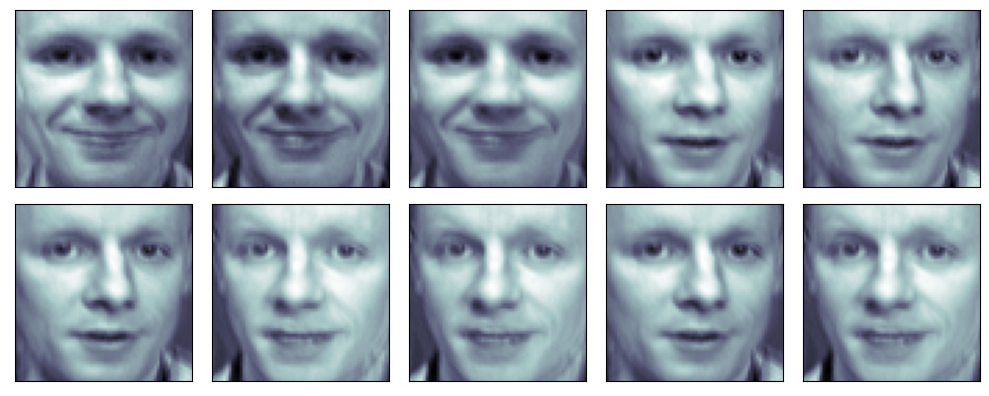

In [75]:
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N,M,n+1)
    ax.imshow(X_inv[n].reshape(64,64), cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.tight_layout()
plt.show()

In [76]:
face_mean = pca.mean_.reshape(64,64)

In [79]:
face_p1 = pca.components_[0].reshape(64,64)
face_p2 = pca.components_[1].reshape(64,64)

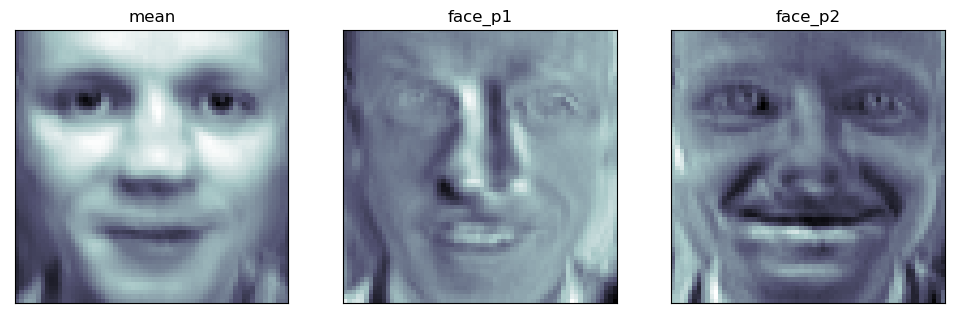

In [81]:
plt.figure(figsize=(12,7))
plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]), plt.yticks([]); plt.title('mean')
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]), plt.yticks([]); plt.title('face_p1')
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]), plt.yticks([]); plt.title('face_p2')
plt.show()

In [82]:
N = 2
M = 5
W = np.linspace(-5,10,N*M)


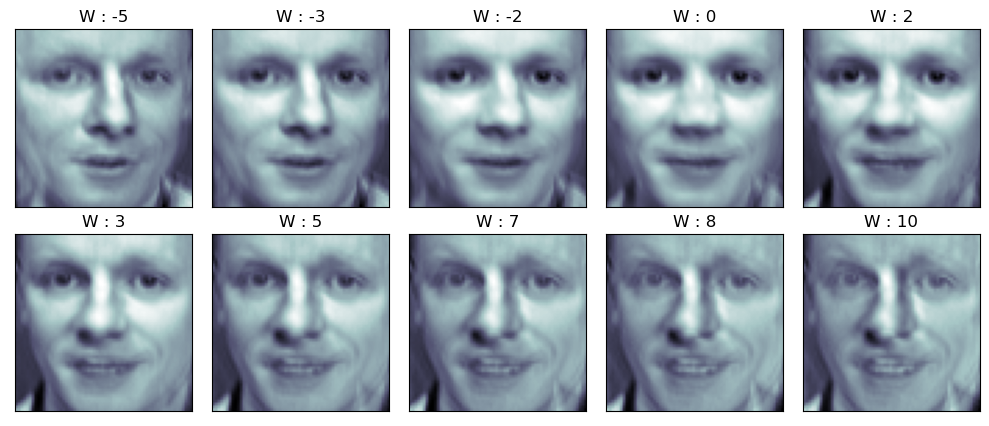

In [85]:
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N,M,n+1)
    ax.imshow(face_mean + W[n]*face_p1, cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title('W : '+ str(round(W[n])))

plt.tight_layout()
plt.show()

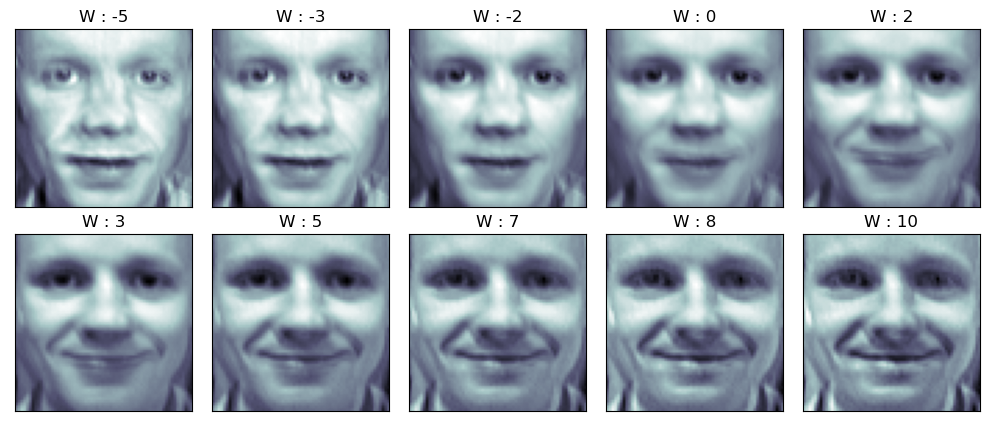

In [86]:
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N,M,n+1)
    ax.imshow(face_mean + W[n]*face_p2, cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title('W : '+ str(round(W[n])))

plt.tight_layout()
plt.show()

In [89]:
nx, ny = (5,5)
x = np.linspace(-5,8,nx)
y = np.linspace(-5,8,ny)

w1, w2 = np.meshgrid(x,y)

In [88]:
w1.shape

(5, 5)

In [90]:
w1 = w1.reshape(-1,)
w2 = w2.reshape(-1,)
w1.shape

(25,)

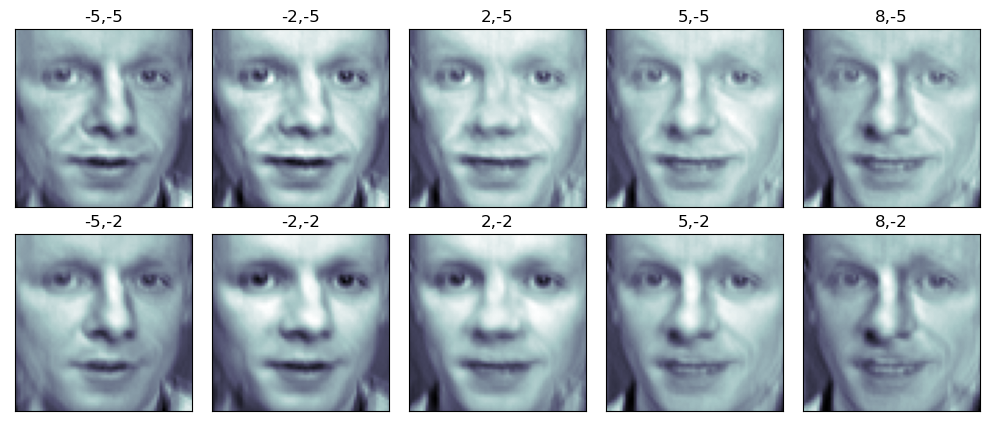

In [92]:
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N,M,n+1)
    ax.imshow(face_mean + w1[n]*face_p1 + w2[n]*face_p2, cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title(str(round(w1[n])) + ',' + str(round(w2[n])))

plt.tight_layout()
plt.show()

---

## HAR data

In [98]:
import pandas as pd
url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'
feature_name_df = pd.read_csv(url, sep='\s+', header=None, names=['column_index','columns_name'])
feature_name = feature_name_df.iloc[:,1].values.tolist()

In [99]:
X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'
X_train = pd.read_csv(X_train_url, sep='\s+', header=None)
X_test = pd.read_csv(X_test_url, sep='\s+', header=None)

X_train.columns = feature_name
X_test.columns = feature_name

In [100]:
y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'
y_train = pd.read_csv(y_train_url, sep='\s+', header=None)
y_test = pd.read_csv(y_test_url, sep='\s+', header=None)

In [101]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

In [104]:
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca

In [105]:
HAR_pca , pca = get_pca_data(X_train, n_components=2)
HAR_pca.shape

(7352, 2)

In [106]:
pca.mean_.shape, pca.components_.shape

((561,), (2, 561))

In [107]:
cols = ['pca_' + str(n) for n in range(pca.components_.shape[0])]
cols

['pca_0', 'pca_1']

In [108]:
def get_pd_from_pca(pca_data, col_num):
    cols = ['pca_' + str(n) for n in range(pca.components_.shape[0])]
    return pd.DataFrame(pca_data, columns=cols)

In [109]:
HAR_pca , pca = get_pca_data(X_train, n_components=2)
HAR_pd_pca = get_pd_from_pca(HAR_pca, pca.components_.shape[0])
HAR_pd_pca['action'] = y_train
HAR_pd_pca.head()

,pca_0,pca_1,action
0,-5.520280,-0.290278,5
1,-5.535350,-0.082530,5
2,-5.474988,0.287387,5
3,-5.677232,0.897031,5
4,-5.748749,1.162952,5


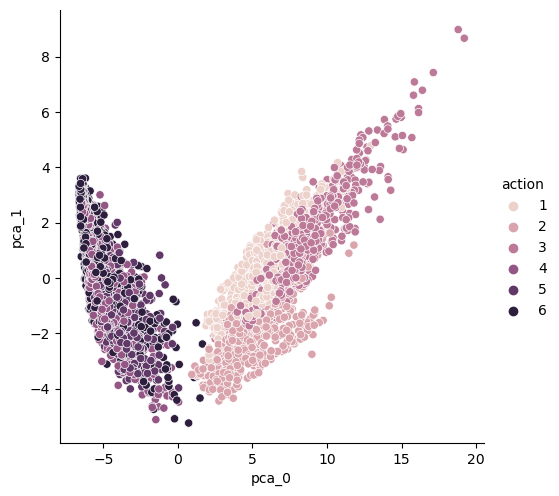

In [110]:
import seaborn as sns

sns.pairplot(HAR_pd_pca, hue='action', height=5, x_vars=['pca_0'], y_vars=['pca_1'])

In [111]:
def print_variance_ratio(pca):
    print('variance ratio : ', pca.explained_variance_ratio_)
    print('sum of variance ratio : ', np.sum(pca.explained_variance_ratio_))

In [112]:
print_variance_ratio(pca)

variance ratio :  [0.6255444  0.04913023]
sum of variance ratio :  0.6746746270487949


In [113]:
HAR_pca , pca = get_pca_data(X_train, n_components=3)
HAR_pd_pca = get_pd_from_pca(HAR_pca, pca.components_.shape[0])
HAR_pd_pca['action'] = y_train
HAR_pd_pca.head()

,pca_0,pca_1,pca_2,action
0,-5.520280,-0.290278,-1.529929,5
1,-5.535350,-0.082530,-1.924804,5
2,-5.474988,0.287387,-2.144642,5
3,-5.677232,0.897031,-2.018220,5
4,-5.748749,1.162952,-2.139533,5


In [114]:
print_variance_ratio(pca)

variance ratio :  [0.6255444  0.04913023 0.04121467]
sum of variance ratio :  0.7158893015785999


In [115]:
HAR_pca , pca = get_pca_data(X_train, n_components=10)
HAR_pd_pca = get_pd_from_pca(HAR_pca, pca.components_.shape[0])
HAR_pd_pca['action'] = y_train
HAR_pd_pca.head()

print_variance_ratio(pca)

variance ratio :  [0.6255444  0.04913023 0.04121467 0.01874956 0.0169486  0.01272069
 0.01176685 0.01068973 0.00969377 0.00858017]
sum of variance ratio :  0.8050386806274455


In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [117]:
params = {
    'max_depth' : [6,8,10],
    'n_estimators' : [50,100,200],
    'min_samples_leaf' : [8,12],
    'min_samples_split' : [8,12]
}

rf_clf = RandomForestClassifier(random_state=1234, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(HAR_pca, y_train.values.reshape(-1))

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=1234),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [118]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [119]:
target_col = ['rank_test_score','mean_test_score','param_n_estimators','param_max_depth']
cv_results_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
35,1,0.838003,200,10
32,1,0.838003,200,10
14,3,0.837731,200,8
17,3,0.837731,200,8
13,5,0.837595,100,8


In [120]:
from sklearn.metrics import accuracy_score

rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(HAR_pca, y_train.values.reshape(-1,))

pred1 = rf_clf_best.predict(pca.transform(X_test))

accuracy_score(y_test, pred1)

0.8547675602307431

In [ ]:
from xgboost import XGBClassifier

evals = [(pca.transform(X_test), y_test)]

xgb = XGBClassifier(n_estimators = 400, learning_rate=0.1, max_depth=3)
xgb.fit(HAR_pca, y_train.values.reshape(-1,), early_stopping_rounds=10, eval_set=evals)

In [ ]:
accuracy_score(y_test, xgb.predict(pca.transform(X_test)))